# Defining the Question

### a) Specifying the Question

Build a machine learning model that predicts a woman’s level of risk of being victimized by a crime given basic information about her and her life.

### b) Defining the Metric for Success

This project will be considered successful if we are able to create a model with an accuracy scorer of 80% or higher and use it to make predictions.

### c) Understanding the context 


South Africa has one of the highest crime rates in Africa, with approximately 2 million crimes reported every year. Women experience crime and are vulnerable to crime in different ways from men. Studies find that while men in South Africa are more likely to be a victim of any type of crime in general, women are more likely to be a victim of particular types of crime, including sexual assault and property damage, and on average feel more unsafe than their male counterparts.


### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Models
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, f1_score, roc_auc_score

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
var = pd.read_csv('/content/VariableDefinitions.csv')
ss = pd.read_csv('/content/SampleSubmission.csv')

In [ ]:
# let us preview our train datset
train.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,Other relative (e.g. in-laws or aunt/uncle) of...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,Father/mother/stepfather/stepmother of person 01,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [ ]:
# let us check the variable definitions
var

,Column,Definition
0,ID,Unique person identification number
1,gender,gender
2,age,Individual age
3,race,Individual race
4,dwelling,The dwelling/house the person occupies
5,dwelling_type,"Is the dwelling formal or informal(Yes-formal,..."
6,province_code,Province code
7,metro_code,Metro code
8,psu,Primary sampling unit of the survey
9,nationality,Individual Nationality


## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(train.shape[0]) + ' rows, and ' + str(train.shape[1]) + ' columns')

This train dataset has 7736 rows, and 21 columns


In [ ]:
# Determining the no. of records in our test dataset
# We are missing the target column in the test data set
print('This test dataset has ' + str(test.shape[0]) + ' rows, and ' + str(test.shape[1]) + ' columns')

This test dataset has 3316 rows, and 20 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

ID                   object
gender               object
age                   int64
race                 object
dwelling             object
dwelling_type        object
province_code        object
metro_code           object
psu                   int64
nationality          object
RTH                  object
marital_st           object
Lang_inside          object
Lang_outside         object
Education            object
lw_work              object
lw_business          object
help_on_household    object
job_or_business      object
nature_of_work       object
target                int64
dtype: object

In [ ]:
# checking the dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 7736 non-null   object
 1   gender             7736 non-null   object
 2   age                7736 non-null   int64 
 3   race               7736 non-null   object
 4   dwelling           7736 non-null   object
 5   dwelling_type      7736 non-null   object
 6   province_code      7736 non-null   object
 7   metro_code         7736 non-null   object
 8   psu                7736 non-null   int64 
 9   nationality        7736 non-null   object
 10  RTH                7736 non-null   object
 11  marital_st         7736 non-null   object
 12  Lang_inside        7736 non-null   object
 13  Lang_outside       7736 non-null   object
 14  Education          7736 non-null   object
 15  lw_work            7736 non-null   object
 16  lw_business        7736 non-null   object


In [ ]:
# let us see the columns in our dataframe
train.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe
profile = ProfileReport(train, title="Women's HAck For Safety", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Women's Hack For Safety.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = train.copy(deep = True)

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = test.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['id', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'rth',
       'marital_st', 'lang_inside', 'lang_outside', 'education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['id', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'rth',
       'marital_st', 'lang_inside', 'lang_outside', 'education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business',
       'nature_of_work'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# our prediction like id and gender(we only have one gender) 

df_copy.drop(['id','gender', 'psu','lang_inside','lang_outside', 'rth'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

,age,race,dwelling,dwelling_type,province_code,metro_code,nationality,marital_st,education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,South Africa,Single and have never been married/never lived...,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,South Africa,Living together like husband and wife,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,South Africa,Widowed,Unspecified,No,No,No,No,Not applicable,0
3,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,South Africa,Single and have never been married/never lived...,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,South Africa,Single and have never been married/never lived...,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [ ]:
# drop the same in the test set
test_copy.drop(['id','gender','psu', 'lang_inside','lang_outside', 'rth'], axis=1, inplace=True)
print(df_copy.shape)
print(test_copy.shape)

(7736, 15)
(3316, 14)


In [ ]:
# from our profile report we can see we have no missing values 
# but let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))


age :  0
race :  0
dwelling :  0
dwelling_type :  0
province_code :  0
metro_code :  0
nationality :  0
marital_st :  0
education :  0
lw_work :  0
lw_business :  0
help_on_household :  0
job_or_business :  0
nature_of_work :  0
target :  0


### Replace values

In [ ]:
df_copy.dwelling_type = df_copy.dwelling_type.replace({'Unspecified':'Informal'})
df_copy.nationality = df_copy.nationality.replace({'Unspecified':'Other'})
df_copy.marital_st = df_copy.marital_st.replace({'Single and have never been married/never lived together as husband/wife before':'Always Single',
                                                 'Living together like husband and wife': 'Married',
                                                 'Single; but have been living together with someone as husband/wife before':'Newly Single',
                                                 'Separated; but still legally married':'Separated'})
# df_copy.rth = df_copy.rth.replace({'Son/daughter/stepchild/adopted child of person 01':'Child',
#                                 'Other relative (e.g. in-laws or aunt/uncle) of person 01': 'Relative',
#                                   'Father/mother/stepfather/stepmother of person 01':'Parent',
#                                   'Head/acting head':'Head',
#                                    'Husband/wife/partner of person 01':'Spouse',
#                                    'Brother/sister/stepbrother/stepsister of person 01':'Sibling',
#                                    'Grandchild/great grandchild of person 01':'Grandchild',
#                                    'Non-related persons':'Not-Related',
#                                    'Grandparent/great grandparent of person 01':'Grandparent'})

df_copy.lw_business = df_copy.lw_business.replace({'Unspecified':'No', 'Do not know': 'No'})
df_copy.lw_work = df_copy.lw_work.replace({'Unspecified':'No', 'Do not know': 'No'})
df_copy.help_on_household = df_copy.help_on_household.replace({'Unspecified':'No', 'Do not know': 'No'})
df_copy.job_or_business = df_copy.job_or_business.replace({'Unspecified':'No', 'Do not know': 'No', 'Not applicable':'No'})
df_copy.nature_of_work = df_copy.nature_of_work.replace({'Not applicable':'Unspecified', 
                                                         'Do not know':'Unspecified', 
                                                         'A fixed period contract': 'Fixed Contract'})
df_copy.dwelling = df_copy.dwelling.replace({'Dwelling/house or brick/concrete block structure on a separate stand or yard or farm':'Brick House',
                                             'Town house (semi-detached house in complex)': 'Town House',
                                             'Room/flat let on a property or a larger dwelling/servants quarters/granny flat': 'Servants Quarters',
                                             'Informal dwelling/shack in backyard': 'Town Shack',
                                             'Flat or apartment in a block of flats': 'Flats',
                                             'Traditional dwelling/hut/structure made of traditional materials': 'Huts',
                                             'Informal dwelling/shack not in backyard, e.g in an informal/squatter settlement or on a farm.': 'Farm Shack',
                                             'Unspecified': 'Other',
                                             'Other (specify)': 'Other',
                                             'Cluster house in complex': 'Complex Cluster House',
                                             'Dwelling/house/flat/room in backyard':'Backyard Room',
                                             'Caravan/tent': 'Other'})


df_copy.education = df_copy.education.replace({'Grade 11/Standard 9/Form 4':'Grade 11',
 'Grade 12/Standard 10/Form 5/Matric (No Exemption)': 'Grade 12 No Exempt',
 'Bachelor�s Degree': "Bachelors Degree", 
 'Grade 1/Sub A/Class 1': 'Grade 1', 
 'Grade 8/Standard 6/Form 1': 'Grade 8',
 'Grade 12/Standard 10/Form 5/Matric (Exemption *)': 'Grade 12 Exempt',
 'Diploma with Grade 12/Std 10': 'Diploma', 
 'Grade 10/Standard 8/Form 3': 'Grade 10',
 'Grade 2/Sub B/Class 2': 'Grade 2', 
 'Grade 7/Standard 5/AET 3': 'Grade 2',
 'Grade 3/Standard 1/AET 1 (Kha Ri Gude; Sanli)':'Grade 3',
  'NTC 3/N3/NC (V)/Level 4' :'NTC 3',
 'Grade 5/Standard 3/AET 2': 'Grade 5',
  'Grade 6/Standard 4': 'Grade 6',
 'Grade 9/Standard 7/Form 2/AET 4': 'Grade 9',
 "Post-Higher Diploma (Technikon/University of Technology; Master's; Doctoral)": "Post Higher Diploma",
 'Certificate with Grade 12/Std 10': 'Certificate',
 'Do not know': 'Unspecified',
 'Grade 4/Standard 2': 'Grade 4',
  'N5/NTC 5': 'N5',
 'Higher Diploma (Technikon/University of Technology)':'Higher Diploma' ,
 'N4/NTC 4': 'N4',
 'Diploma with less than Grade 12/Std 10': 'Lower Diploma',
 'Bachelor�s Degree and post-graduate diploma':'Degree and Higher Diploma' ,
 "Higher degree (Master's; Doctorate)": "Higher Degree",
 'Other': 'Unspecified', 
 'N6/NTC 6': 'N6',
 'NTC 2/N2/NC (V)/Level 3': 'N2',
 'Certificate with less than Grade 12/Std 10': 'Lower Certificate',
 'NTC 1/N1/NC (V) /Level 2': 'N1'})
                  

df_copy.metro_code = df_copy.metro_code.replace({'NW - Non Metro':'Non Metro',
                                             'LP - Non Metro':'Non Metro',
                                             'EC - Non Metro':'Non Metro',
                                             'KZN - eThekwini':'Metro',
                                             'GP - City of Johannesburg':'Metro',
                                             'KZN - Non Metro':'Non Metro',
                                             'GP - Ekurhuleni':'Non Metro',
                                             'FS - Mangaung':'Metro',
                                             'MP - Non Metro':'Non Metro', 
                                             'WC - City of Cape Town':'Metro',
                                             'GP - Non Metro' :'Non Metro',
                                             'EC - Nelson Mandela Bay': 'Metro',
                                             'GP - City of Tshwane':'Metro',
                                             'WC - Non Metro' :'Non Metro',
                                             'NC - Non Metro' :'Non Metro',
                                             'FS - Non Metro' :'Non Metro',
                                             'EC - Buffalo City':'Metro'})

In [ ]:
test_copy.dwelling_type = test_copy.dwelling_type.replace({'Unspecified':'Informal'})
test_copy.nationality = test_copy.nationality.replace({'Unspecified':'Other'})
test_copy.marital_st = test_copy.marital_st.replace({'Single and have never been married/never lived together as husband/wife before':'Always Single',
                                                 'Living together like husband and wife': 'Married',
                                                 'Single; but have been living together with someone as husband/wife before':'Newly Single',
                                                 'Separated; but still legally married':'Separated'})
# test_copy.rth = test_copy.rth.replace({'Son/daughter/stepchild/adopted child of person 01':'Child',
#                                 'Other relative (e.g. in-laws or aunt/uncle) of person 01': 'Relative',
#                                   'Father/mother/stepfather/stepmother of person 01':'Parent',
#                                   'Head/acting head':'Head',
#                                    'Husband/wife/partner of person 01':'Spouse',
#                                    'Brother/sister/stepbrother/stepsister of person 01':'Sibling',
#                                    'Grandchild/great grandchild of person 01':'Grandchild',
#                                    'Non-related persons':'Not-Related',
#                                    'Grandparent/great grandparent of person 01':'Grandparent'})

test_copy.lw_business = test_copy.lw_business.replace({'Unspecified':'No', 'Do not know': 'No'})
test_copy.lw_work = test_copy.lw_work.replace({'Unspecified':'No', 'Do not know': 'No'})
test_copy.help_on_household = test_copy.help_on_household.replace({'Unspecified':'No', 'Do not know': 'No'})
test_copy.job_or_business = test_copy.job_or_business.replace({'Unspecified':'No', 'Do not know': 'No', 'Not applicable':'No'})
test_copy.nature_of_work = test_copy.nature_of_work.replace({'Not applicable':'Unspecified', 
                                                         'Do not know':'Unspecified', 
                                                         'A fixed period contract': 'Fixed Contract'})
test_copy.dwelling = test_copy.dwelling.replace({'Dwelling/house or brick/concrete block structure on a separate stand or yard or farm':'Brick House',
                                             'Town house (semi-detached house in complex)': 'Town House',
                                             'Room/flat let on a property or a larger dwelling/servants quarters/granny flat': 'Servants Quarters',
                                             'Informal dwelling/shack in backyard': 'Town Shack',
                                             'Flat or apartment in a block of flats': 'Flats',
                                             'Traditional dwelling/hut/structure made of traditional materials': 'Huts',
                                             'Informal dwelling/shack not in backyard, e.g in an informal/squatter settlement or on a farm.': 'Farm Shack',
                                             'Unspecified': 'Other',
                                             'Other (specify)': 'Other',
                                             'Cluster house in complex': 'Complex Cluster House',
                                             'Dwelling/house/flat/room in backyard':'Backyard Room'})


test_copy.education = test_copy.education.replace({'Grade 11/Standard 9/Form 4':'Grade 11',
 'Grade 12/Standard 10/Form 5/Matric (No Exemption)': 'Grade 12 No Exempt',
 'Bachelor�s Degree': "Bachelors Degree", 
 'Grade 1/Sub A/Class 1': 'Grade 1', 
 'Grade 8/Standard 6/Form 1': 'Grade 8',
 'Grade 12/Standard 10/Form 5/Matric (Exemption *)': 'Grade 12 Exempt',
 'Diploma with Grade 12/Std 10': 'Diploma', 
 'Grade 10/Standard 8/Form 3': 'Grade 10',
 'Grade 2/Sub B/Class 2':'Grade 2', 'Grade 7/Standard 5/AET 3': 'Grade 2',
 'Grade 3/Standard 1/AET 1 (Kha Ri Gude; Sanli)':'Grade 3',
  'NTC 3/N3/NC (V)/Level 4' :'NTC 3',
 'Grade 5/Standard 3/AET 2': 'Grade 5',
  'Grade 6/Standard 4': 'Grade 6',
 'Grade 9/Standard 7/Form 2/AET 4': 'Grade 9',
 "Post-Higher Diploma (Technikon/University of Technology; Master's; Doctoral)": "Post Higher Diploma",
 'Certificate with Grade 12/Std 10': 'Certificate',
 'Do not know': 'Unspecified',
 'Grade 4/Standard 2': 'Grade 4',
  'N5/NTC 5': 'N5',
 'Higher Diploma (Technikon/University of Technology)':'Higher Diploma' ,
 'N4/NTC 4': 'N4',
 'Diploma with less than Grade 12/Std 10': 'Lower Diploma',
 'Bachelor�s Degree and post-graduate diploma':'Degree and Higher Diploma' ,
 "Higher degree (Master's; Doctorate)": "Higher Degree",
 'Other': 'Unspecified', 
 'N6/NTC 6': 'N6',
 'NTC 2/N2/NC (V)/Level 3': 'N2',
 'Certificate with less than Grade 12/Std 10': 'Lower Certificate',
 'NTC 1/N1/NC (V) /Level 2': 'N1'})

test_copy.metro_code = test_copy.metro_code.replace({'NW - Non Metro':'Non Metro',
                                             'LP - Non Metro':'Non Metro',
                                             'EC - Non Metro':'Non Metro',
                                             'KZN - eThekwini':'Metro',
                                             'GP - City of Johannesburg':'Metro',
                                             'KZN - Non Metro':'Non Metro',
                                             'GP - Ekurhuleni':'Non Metro',
                                             'FS - Mangaung':'Metro',
                                             'MP - Non Metro':'Non Metro', 
                                             'WC - City of Cape Town':'Metro',
                                             'GP - Non Metro' :'Non Metro',
                                             'EC - Nelson Mandela Bay': 'Metro',
                                             'GP - City of Tshwane':'Metro',
                                             'WC - Non Metro' :'Non Metro',
                                             'NC - Non Metro' :'Non Metro',
                                             'FS - Non Metro' :'Non Metro',
                                             'EC - Buffalo City':'Metro'})

In [ ]:
# let us see the unique values of all our columns
#for col in df:
 #   print(df[col].unique())
 #df.describe(include='all').loc['unique', :]
for col in list(df_copy):
    print(col)
    print(df_copy[col].nunique())

age
85
race
4
dwelling
11
dwelling_type
2
province_code
9
metro_code
2
nationality
2
marital_st
7
education
30
lw_work
2
lw_business
2
help_on_household
2
job_or_business
2
nature_of_work
6
target
2


In [ ]:
# let us see the unique values of all our columns
#for col in df:
 #   print(df[col].unique())
 #df.describe(include='all').loc['unique', :]
for col in list(test_copy):
    print(col)
    print(test_copy[col].nunique())

age
78
race
4
dwelling
11
dwelling_type
2
province_code
9
metro_code
2
nationality
2
marital_st
7
education
30
lw_work
2
lw_business
2
help_on_household
2
job_or_business
2
nature_of_work
6


# Exploratory Data Analysis

In [ ]:
# let us see some info on our dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                7736 non-null   int64 
 1   race               7736 non-null   object
 2   dwelling           7736 non-null   object
 3   dwelling_type      7736 non-null   object
 4   province_code      7736 non-null   object
 5   metro_code         7736 non-null   object
 6   nationality        7736 non-null   object
 7   marital_st         7736 non-null   object
 8   education          7736 non-null   object
 9   lw_work            7736 non-null   object
 10  lw_business        7736 non-null   object
 11  help_on_household  7736 non-null   object
 12  job_or_business    7736 non-null   object
 13  nature_of_work     7736 non-null   object
 14  target             7736 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 906.7+ KB


In [ ]:
# let us see some summary statistics of the dataset
df_copy.describe()

,age,target
count,7736.000000,7736.000000
mean,42.193252,0.078206
std,17.269251,0.268513
min,16.000000,0.000000
25%,29.000000,0.000000
50%,39.000000,0.000000
75%,54.000000,0.000000
max,102.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca15bba690>,
      dtype=object)

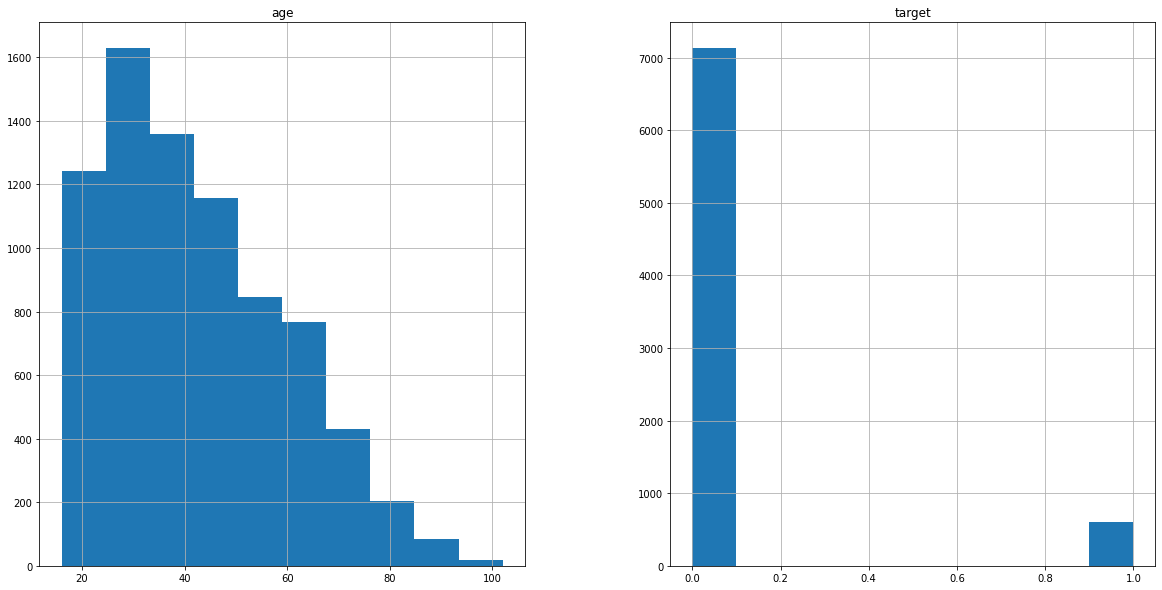

In [ ]:
# let us plot histograms to visualize patterns in the data
df_copy.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

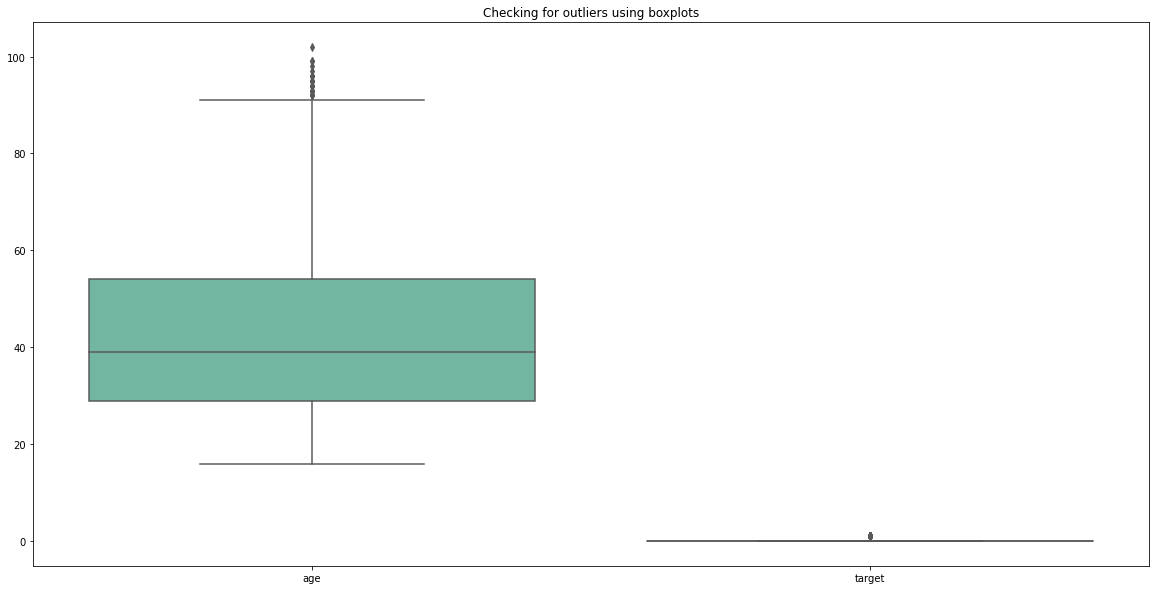

In [ ]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_copy, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate there are no outliers in each of the numerical columns

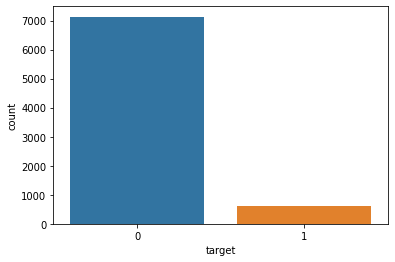

In [ ]:
# let us see the distribution of our targetcolumn in our dataset

sns.countplot(x="target", data = df_copy)

# we can see that most women don't have a crime happen to them

In [ ]:
# let us see the unique values of all our columns
#for col in df:
 #   print(df[col].unique())
 #df.describe(include='all').loc['unique', :]
for col in list(df_copy):
    print(col)
    print(df_copy[col].unique())

age
[ 20  42  86  26  45  21  75  23  17  33  52  78  34  79  41  66  64  43
  29  61  47  59  22  19  46  25  28  54  49  40  69  57  51  81  60  31
  39  48  63  27  36  30  76  53  88  18  38  32  65  73  35  24  37  70
  55  50  56  74  67  89  44  58  62  16  77  68  80  72  83  71  84  85
  90  82  87  98  92  91  96  93  95  94  99  97 102]
race
['Black African' 'Indian/Asian' 'White' 'Coloured']
dwelling
['Brick House' 'Town House' 'Servants Quarters' 'Town Shack' 'Flats'
 'Huts' 'Backyard Room' 'Farm Shack' 'Other' 'Complex Cluster House'
 'Semi-Detached house']
dwelling_type
['Formal' 'Informal']
province_code
['North West' 'Limpopo' 'Eastern Cape' 'KwaZulu-Natal' 'Gauteng'
 'Free State' 'Mpumalanga' 'Western Cape' 'Northern Cape']
metro_code
['Non Metro' 'Metro']
nationality
['South Africa' 'Other']
marital_st
['Always Single' 'Married' 'Widowed' 'Divorced' 'Newly Single' 'Separated'
 'Unspecified']
education
['Grade 11' 'Grade 12 No Exempt' 'Unspecified' 'Bachelors Degree'


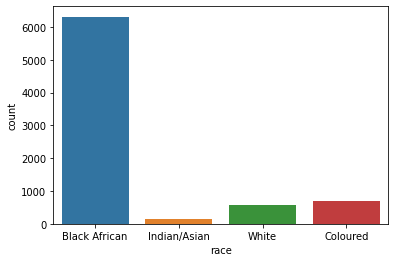

In [ ]:
# race column
sns.countplot(x="race", data = df_copy)
# we can see that most of the data is on Black-African women

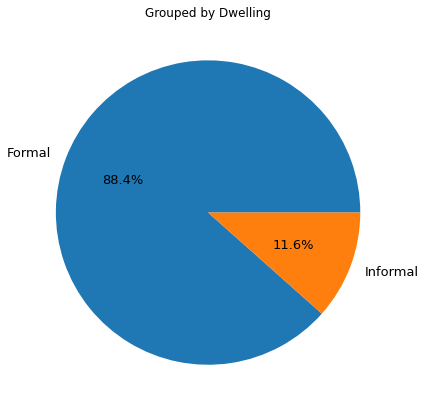

In [ ]:
# let us find out the distribution of dwelling type
pclass_count = df_copy.groupby('dwelling_type')['dwelling_type'].count()

plt.figure(figsize=(10,7))
plt.title('Grouped by Dwelling')
plt.pie(pclass_count.values, labels=['Formal', 'Informal'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()
# most of the women live in formal dwellings

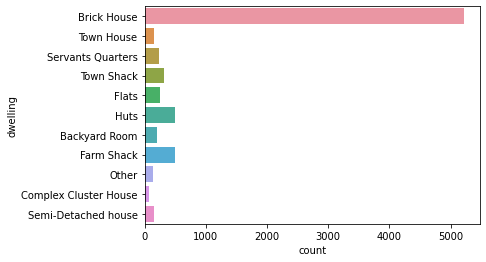

In [ ]:
 # dwelling column
sns.countplot(y="dwelling", data = df_copy)

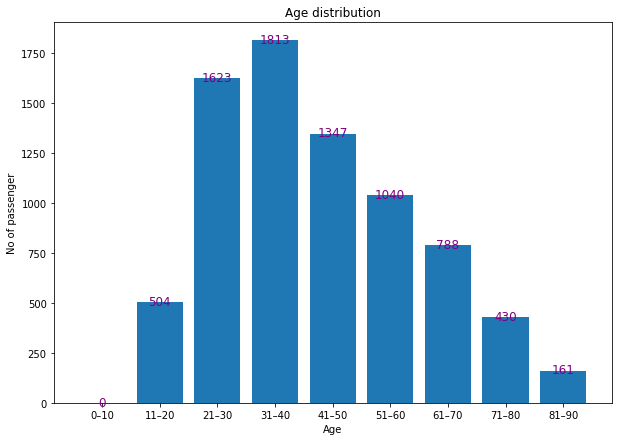

In [ ]:
#let us see the age distribution
# retrieve all non-NaN age values and then store the result to ages Numpy array
ages = df_copy[df_copy['age'].notnull()]['age'].values

ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

#define labels in ages_hist_labels
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60',
                    '61–70', '71–80', '81–90']

#we can show the histogram like this
plt.figure(figsize=(10,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12, color='purple',
             horizontalalignment='center', verticalalignment='center')
plt.show()

# we can see that most of the women were aged between 21 and 50 years

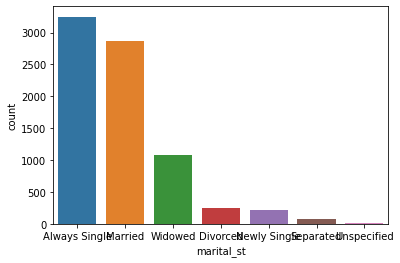

In [ ]:
sns.countplot(x="marital_st", data = df_copy)

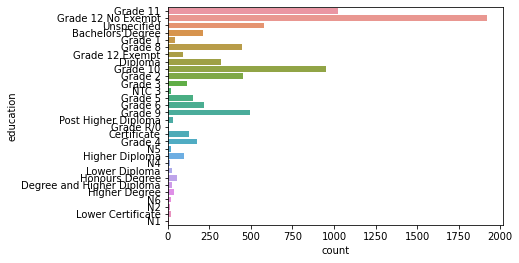

In [ ]:
sns.countplot(y="education", data = df_copy)

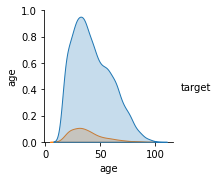

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_copy, hue="target")
plt.show()

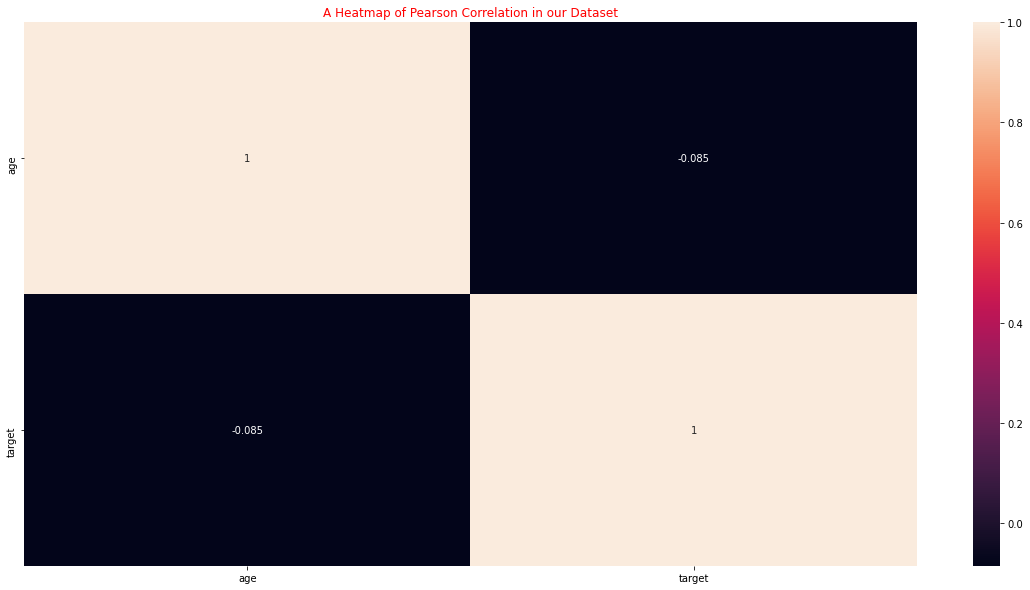

In [ ]:
# Calculating the pearson coefficient correlation
a = df_copy.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

# Feature Engineering

### extract age group from age column

In [ ]:
#we need to convert the ‘age’ feature to agegroups
data = [df_copy, test_copy]
for dataset in data:
    dataset['agegroup'] = dataset['age'].astype(int)
    dataset.loc[ dataset['agegroup'] <= 11, 'age'] = 0
    dataset.loc[(dataset['agegroup'] > 11) & (dataset['agegroup'] <= 18), 'agegroup'] = 1
    dataset.loc[(dataset['agegroup'] > 18) & (dataset['agegroup'] <= 22), 'agegroup'] = 2
    dataset.loc[(dataset['agegroup'] > 22) & (dataset['agegroup'] <= 27), 'agegroup'] = 3
    dataset.loc[(dataset['agegroup'] > 27) & (dataset['agegroup'] <= 33), 'agegroup'] = 4
    dataset.loc[(dataset['agegroup'] > 33) & (dataset['agegroup'] <= 40), 'agegroup'] = 5
    dataset.loc[(dataset['agegroup'] > 40) & (dataset['agegroup'] <= 66), 'agegroup'] = 6
    dataset.loc[ dataset['agegroup'] > 66, 'agegroup'] = 6
# let's see how it's distributed 
print(df_copy['agegroup'].value_counts())
print(test_copy['agegroup'].value_counts())

6    3648
5    1217
4    1130
3     809
2     561
1     371
Name: agegroup, dtype: int64
6    1516
4     512
5     493
3     358
2     260
1     177
Name: agegroup, dtype: int64


In [ ]:
# let us drop the age column cause we have age groups now
df_copy.drop(['age'],axis=1,inplace=True)
test_copy.drop(['age'],axis=1,inplace=True)

In [ ]:
print(df_copy.shape)
print(test_copy.shape)

(7736, 15)
(3316, 14)


# Data Preprocessing

In [ ]:
#multicollinearity
#multicollinearity test
# Let's display the correlations between the variables
correlations = df_copy.corr()

correlations

,target,agegroup
target,1.000000,-0.057138
agegroup,-0.057138,1.000000


In [ ]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,target,agegroup
target,1.003275,0.057325
agegroup,0.057325,1.003275


In [ ]:
#it's time to transform all variables into numeric ones. 
#because machine learning models generally take numeric input
final_train = pd.get_dummies(df_copy, drop_first=True)
final_train.head()

,target,agegroup,race_Coloured,race_Indian/Asian,race_White,dwelling_Brick House,dwelling_Complex Cluster House,dwelling_Farm Shack,dwelling_Flats,dwelling_Huts,dwelling_Other,dwelling_Semi-Detached house,dwelling_Servants Quarters,dwelling_Town House,dwelling_Town Shack,dwelling_type_Informal,province_code_Free State,province_code_Gauteng,province_code_KwaZulu-Natal,province_code_Limpopo,province_code_Mpumalanga,province_code_North West,province_code_Northern Cape,province_code_Western Cape,metro_code_Non Metro,nationality_South Africa,marital_st_Divorced,marital_st_Married,marital_st_Newly Single,marital_st_Separated,marital_st_Unspecified,marital_st_Widowed,education_Certificate,education_Degree and Higher Diploma,education_Diploma,education_Grade 1,education_Grade 10,education_Grade 11,education_Grade 12 Exempt,education_Grade 12 No Exempt,education_Grade 2,education_Grade 3,education_Grade 4,education_Grade 5,education_Grade 6,education_Grade 8,education_Grade 9,education_Grade R/0,education_Higher Degree,education_Higher Diploma,education_Honours Degree,education_Lower Certificate,education_Lower Diploma,education_N1,education_N2,education_N4,education_N5,education_N6,education_NTC 3,education_Post Higher Diploma,education_Unspecified,lw_work_Yes,lw_business_Yes,help_on_household_Yes,job_or_business_Yes,nature_of_work_Fixed Contract,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#it's time to transform all variables into numeric ones. 
#because machine learning models generally take numeric input
final_test = pd.get_dummies(test_copy, drop_first=True)
final_test.head()

,agegroup,race_Coloured,race_Indian/Asian,race_White,dwelling_Brick House,dwelling_Complex Cluster House,dwelling_Farm Shack,dwelling_Flats,dwelling_Huts,dwelling_Other,dwelling_Semi-Detached house,dwelling_Servants Quarters,dwelling_Town House,dwelling_Town Shack,dwelling_type_Informal,province_code_Free State,province_code_Gauteng,province_code_KwaZulu-Natal,province_code_Limpopo,province_code_Mpumalanga,province_code_North West,province_code_Northern Cape,province_code_Western Cape,metro_code_Non Metro,nationality_South Africa,marital_st_Divorced,marital_st_Married,marital_st_Newly Single,marital_st_Separated,marital_st_Unspecified,marital_st_Widowed,education_Certificate,education_Degree and Higher Diploma,education_Diploma,education_Grade 1,education_Grade 10,education_Grade 11,education_Grade 12 Exempt,education_Grade 12 No Exempt,education_Grade 2,education_Grade 3,education_Grade 4,education_Grade 5,education_Grade 6,education_Grade 8,education_Grade 9,education_Grade R/0,education_Higher Degree,education_Higher Diploma,education_Honours Degree,education_Lower Certificate,education_Lower Diploma,education_N1,education_N2,education_N4,education_N5,education_N6,education_NTC 3,education_Post Higher Diploma,education_Unspecified,lw_work_Yes,lw_business_Yes,help_on_household_Yes,job_or_business_Yes,nature_of_work_Fixed Contract,nature_of_work_Permanent,nature_of_work_Seasonal,nature_of_work_Temporary,nature_of_work_Unspecified
0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(final_test.shape)
print(final_train.shape)

(3316, 69)
(7736, 70)


# Modeling Time - OverSampling

##### Compare Algorithms

In [ ]:
# Installing catboost
!pip install catboost

In [ ]:
# compare algorithms
from matplotlib import pyplot
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Declaring our X and y variables
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# #scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.678233 (0.012747)
LDA: 0.678957 (0.012372)
KNN: 0.913878 (0.004379)
CART: 0.932814 (0.007383)
RF: 0.979608 (0.003792)
GBC: 0.748364 (0.014785)
NB: 0.657334 (0.013904)
SVM: 0.697057 (0.014837)
XGB: 0.737861 (0.014960)


### Random Forest

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)



# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The area under curve score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.936935425304744
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2121
           1       0.90      0.99      0.94      2158

    accuracy                           0.94      4279
   macro avg       0.94      0.94      0.94      4279
weighted avg       0.94      0.94      0.94      4279



The area under curve score for our train dataset is: 0.958649963294806
The f1 score for our train dataset is 0.959696261682243
[[4640  370]
 [  44 4929]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5010
           1       0.93      0.99      0.96      4973

    accuracy                           0.96      9983
   macro avg       0.96      0.96      0.96      9983
weighted avg       0.96      0.96      0.96      9983



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Auc: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Auc: 0.984 (0.003)


In [ ]:
X = final_train.drop('target', axis=1)
# let us see the 10 most important features of or dataframe
a =pd.DataFrame({'Features' : X.columns, 'Importance' : rfc.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')
a.head(20)

,Importance
Features,
agegroup,0.145194
marital_st_Married,0.053403
metro_code_Non Metro,0.035244
education_Grade 12 No Exempt,0.034598
province_code_Gauteng,0.031864
dwelling_Brick House,0.028593
education_Grade 10,0.028441
lw_work_Yes,0.026354
education_Grade 11,0.025731


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
# Checking for the best parameters
#
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.1min finished


The best parameters are: {'n_estimators': 670, 'min_samples_split': 2, 'max_depth': 20}


In [ ]:
# using best params
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# train, test = train_test_split(X, y,test_size=0.20,stratify=True)

# X_train, X_test, y_train, y_test  = train_test_split(final_train.iloc[:, 1:], final_train.target, test_size=0.30, stratify=final_train.target)
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101, n_estimators=670, min_samples_split=2, max_depth=20)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.9030121137361982
0.9034821219911194
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2121
           1       0.87      0.96      0.91      2158

    accuracy                           0.90      4279
   macro avg       0.91      0.90      0.90      4279
weighted avg       0.91      0.90      0.90      4279



The auc score for our train dataset is: 0.9337001645211487
The f1 score for our train dataset is 0.9353359992197406
[[4525  485]
 [ 178 4795]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5010
           1       0.91      0.96      0.94      4973

    accuracy                           0.93      9983
   macro avg       0.94      0.93      0.93      9983
weighted avg       0.94      0.93      0.93      9983



### Catboost

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=50, depth=8, learning_rate=0.01)
# Train a model

cb.fit(X_train, y_train)

# Make predictions
y_pred = cb.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = cb.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0:	learn: 0.6915772	total: 15.3ms	remaining: 750ms
1:	learn: 0.6894750	total: 23.4ms	remaining: 561ms
2:	learn: 0.6879819	total: 31.4ms	remaining: 492ms
3:	learn: 0.6867947	total: 39ms	remaining: 449ms
4:	learn: 0.6847807	total: 48.6ms	remaining: 438ms
5:	learn: 0.6834446	total: 59.8ms	remaining: 438ms
6:	learn: 0.6822706	total: 67.5ms	remaining: 415ms
7:	learn: 0.6809536	total: 75.2ms	remaining: 395ms
8:	learn: 0.6796954	total: 82.9ms	remaining: 378ms
9:	learn: 0.6782045	total: 90.5ms	remaining: 362ms
10:	learn: 0.6768541	total: 98.1ms	remaining: 348ms
11:	learn: 0.6753943	total: 106ms	remaining: 334ms
12:	learn: 0.6738504	total: 113ms	remaining: 323ms
13:	learn: 0.6727429	total: 121ms	remaining: 311ms
14:	learn: 0.6716615	total: 129ms	remaining: 300ms
15:	learn: 0.6702889	total: 137ms	remaining: 291ms
16:	learn: 0.6692507	total: 144ms	remaining: 280ms
17:	learn: 0.6682702	total: 152ms	remaining: 270ms
18:	learn: 0.6673789	total: 161ms	remaining: 263ms
19:	learn: 0.6662982	total: 168m

### LGBM

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling
# from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from lightgbm import LGBMClassifier
# Train a model
model = LGBMClassifier(random_state=0, learning_rate= 0.01, n_estimators= 8, num_leaves= 16)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = model.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.637668725167234
0.6375321336760925
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2121
           1       0.65      0.62      0.63      2158

    accuracy                           0.64      4279
   macro avg       0.64      0.64      0.64      4279
weighted avg       0.64      0.64      0.64      4279



The auc score for our train dataset is: 0.6368491249955346
The f1 score for our train dataset is 0.6326882156246834
[[3236 1774]
 [1851 3122]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      5010
           1       0.64      0.63      0.63      4973

    accuracy                           0.64      9983
   macro avg       0.64      0.64      0.64      9983
weighted avg       0.64      0.64      0.64      9983



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LGBMClassifier(random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Auc: %.3f (%.3f)' % (mean(scores), std(scores)))

Auc: 0.882 (0.010)


In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    } 
lg = LGBMClassifier() 
grid = GridSearchCV(lg, gridParams, refit = True, verbose = 1, cv=4, n_jobs=-1)

#Fit the model for grid search
grid.fit(X_train, y_train)

Fitting 4 folds for each of 3456 candidates, totalling 13824 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 13824 out of 13824 | elapsed:  1.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65, 0.66],
                         'learning_rate': [0.005, 0.01], 'max_bin': [255, 510],
                         'n_estimators': [8, 16, 24],
              

In [ ]:
#Now find the best parameters.
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.01, 'max_bin': 255, 'n_estimators': 24, 'num_leaves': 12, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.7}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.65,
               importance_type='split', learning_rate=0.01, max_bin=255,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=24, n_jobs=-1, num_leaves=12,
               objective='binary', random_state=500, reg_alpha=1.2,
               reg_lambda=1.2, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)
0.587929222927658


### XGB


In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# oversampling


ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)


xc = XGBClassifier(random_state=101)
# Train a model

xc.fit(X_train, y_train)

# Make predictions
y_pred = xc.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.6818686999111667
0.6826361299369011
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      2121
           1       0.66      0.77      0.71      2158

    accuracy                           0.68      4279
   macro avg       0.69      0.68      0.68      4279
weighted avg       0.69      0.68      0.68      4279



The auc score for our train dataset is: 0.6902846428598663
The f1 score for our train dataset is 0.7133462998981198
[[3037 1973]
 [1122 3851]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      5010
           1       0.66      0.77      0.71      4973

    accuracy                           0.69      9983
   macro avg       0.70      0.69      0.69      9983
weighted avg       0.70      0.69      0.69      9983



### Logistic

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
# create instance of logistic regression
logmodel = LogisticRegression()

# fit the model
logmodel.fit(X_train, y_train)

# make predictions
y_pred = logmodel.predict(X_test)

# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.6339035829969862
0.6342603412012152
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      2121
           1       0.63      0.68      0.65      2158

    accuracy                           0.63      4279
   macro avg       0.63      0.63      0.63      4279
weighted avg       0.63      0.63      0.63      4279



The auc score for our train dataset is: 0.6807330643358366
The f1 score for our train dataset is 0.7019248738553542
[[3037 1973]
 [1217 3756]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      5010
           1       0.66      0.76      0.70      4973

    accuracy                           0.68      9983
   macro avg       0.68      0.68      0.68      9983
weighted avg       0.68      0.68      0.68      9983



### GBC

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Instantiating the model
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred_gbc))
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))
print(classification_report(y_test, y_pred))

0.6752384360639162
0.6758588455246552
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      2121
           1       0.66      0.75      0.70      2158

    accuracy                           0.68      4279
   macro avg       0.68      0.68      0.67      4279
weighted avg       0.68      0.68      0.67      4279



The auc score for our train dataset is: 0.6932660317811993
The f1 score for our train dataset is 0.7144321252212801
[[3084 1926]
 [1139 3834]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.62      2121
           1       0.63      0.68      0.65      2158

    accuracy                           0.63      4279
   macro avg       0.63      0.63      0.63      4279
weighted avg       0.63      0.63      0.63      4279



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gbc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Auc: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Auc: 0.750 (0.010)


# Modeling Time 2- Undersampling


##### Compare Algorithms

In [ ]:
# compare algorithms
from matplotlib import pyplot
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Declaring our X and y variables
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.616907 (0.029391)
LDA: 0.602407 (0.032771)
KNN: 0.567600 (0.046522)
CART: 0.520961 (0.051599)
RF: 0.572047 (0.046780)
GBC: 0.627567 (0.038520)
NB: 0.595022 (0.045316)
SVM: 0.633099 (0.051481)
XGB: 0.634827 (0.040490)


### Random Forest

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
# from imblearn.over_sampling import RandomOverSampler

ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)



# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = rfc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.6287412374276136
0.6253443526170799
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       170
           1       0.67      0.58      0.62       193

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.63       363
weighted avg       0.63      0.63      0.62       363



The auc score for our train dataset is: 0.964298069411896
The f1 score for our train dataset is 0.963235294117647
[[424  11]
 [ 19 393]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       435
           1       0.97      0.95      0.96       412

    accuracy                           0.96       847
   macro avg       0.96      0.96      0.96       847
weighted avg       0.96      0.96      0.96       847



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# oversampling
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

rfc = RandomForestClassifier(random_state=101)
# Train a model

rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

AUC: 0.593 (0.036)


### Catboost

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=50, depth=8, learning_rate=0.5)
# Train a model

cb.fit(X_train, y_train)

# Make predictions
y_pred = cb.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = cb.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0:	learn: 0.6673206	total: 6.5ms	remaining: 319ms
1:	learn: 0.6236161	total: 8.9ms	remaining: 214ms
2:	learn: 0.5939658	total: 11.3ms	remaining: 177ms
3:	learn: 0.5795062	total: 13.8ms	remaining: 159ms
4:	learn: 0.5592884	total: 16.3ms	remaining: 146ms
5:	learn: 0.5417052	total: 18.7ms	remaining: 137ms
6:	learn: 0.5300379	total: 21.3ms	remaining: 131ms
7:	learn: 0.5204434	total: 23.7ms	remaining: 124ms
8:	learn: 0.5055197	total: 26ms	remaining: 119ms
9:	learn: 0.4969462	total: 28.9ms	remaining: 116ms
10:	learn: 0.4828029	total: 31.7ms	remaining: 112ms
11:	learn: 0.4659327	total: 34.5ms	remaining: 109ms
12:	learn: 0.4626043	total: 35.8ms	remaining: 102ms
13:	learn: 0.4535714	total: 38.8ms	remaining: 99.8ms
14:	learn: 0.4438513	total: 41.5ms	remaining: 96.8ms
15:	learn: 0.4349307	total: 44.1ms	remaining: 93.7ms
16:	learn: 0.4262037	total: 46.9ms	remaining: 90.9ms
17:	learn: 0.4004779	total: 49.7ms	remaining: 88.3ms
18:	learn: 0.3858091	total: 52.5ms	remaining: 85.6ms
19:	learn: 0.3819812

### LGBM

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from lightgbm import LGBMClassifier
# Train a model
model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = model.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.5543736665650717
0.5537190082644629
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       170
           1       0.59      0.54      0.56       193

    accuracy                           0.55       363
   macro avg       0.55      0.55      0.55       363
weighted avg       0.56      0.55      0.55       363



The auc score for our train dataset is: 0.8439766767101885
The f1 score for our train dataset is 0.8394160583941606
[[370  65]
 [ 67 345]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       435
           1       0.84      0.84      0.84       412

    accuracy                           0.84       847
   macro avg       0.84      0.84      0.84       847
weighted avg       0.84      0.84      0.84       847



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LGBMClassifier(random_state=0)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Auc: %.3f (%.3f)' % (mean(scores), std(scores)))

Auc: 0.606 (0.054)


### XGB


In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)


xc = XGBClassifier(random_state=101)
# Train a model

xc.fit(X_train, y_train)

# Make predictions
y_pred = xc.predict(X_test)

# Check score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.5887534288326729
0.5895316804407713
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       170
           1       0.62      0.60      0.61       193

    accuracy                           0.59       363
   macro avg       0.59      0.59      0.59       363
weighted avg       0.59      0.59      0.59       363



The auc score for our train dataset is: 0.7131235353197187
The f1 score for our train dataset is 0.71889400921659
[[291 144]
 [100 312]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       435
           1       0.68      0.76      0.72       412

    accuracy                           0.71       847
   macro avg       0.71      0.71      0.71       847
weighted avg       0.72      0.71      0.71       847



### Logistic

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
# create instance of logistic regression
logmodel = LogisticRegression()

# fit the model
logmodel.fit(X_train, y_train)

# make predictions
y_pred = logmodel.predict(X_test)

# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = xc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

0.6055623285583663
0.6033057851239669
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       170
           1       0.64      0.57      0.60       193

    accuracy                           0.60       363
   macro avg       0.61      0.61      0.60       363
weighted avg       0.61      0.60      0.60       363



The auc score for our train dataset is: 0.6453074433656958
The f1 score for our train dataset is 0.6731391585760518
[[232 203]
 [100 312]]
              precision    recall  f1-score   support

           0       0.70      0.53      0.60       435
           1       0.61      0.76      0.67       412

    accuracy                           0.64       847
   macro avg       0.65      0.65      0.64       847
weighted avg       0.65      0.64      0.64       847



### GBC

In [ ]:
# Declaring our X and y variables
# 
X = final_train.drop('target', axis=1)
y = final_train.target

# # oversampling to deal with class imbalance
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
ros = RandomUnderSampler()
X, y = ros.fit_sample(X, y)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#scale the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

# Instantiating the model
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
# printing the accuracy using accuracy score
print(roc_auc_score(y_test, y_pred_gbc))
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The auc score for our train dataset is: {roc_auc_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))
print(classification_report(y_test, y_pred))

0.5823072234074977
0.5867768595041323
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       170
           1       0.60      0.65      0.63       193

    accuracy                           0.59       363
   macro avg       0.58      0.58      0.58       363
weighted avg       0.59      0.59      0.58       363



The auc score for our train dataset is: 0.7516376520477626
The f1 score for our train dataset is 0.7617977528089888
[[296 139]
 [ 73 339]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       170
           1       0.64      0.57      0.60       193

    accuracy                           0.60       363
   macro avg       0.61      0.61      0.60       363
weighted avg       0.61      0.60      0.60       363



Observation - Our Oversampled models perform better than the undersampled models.

# Submission Files

In [ ]:
### predict on the test data
test_predictions = rfc.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_random.csv", index=False

In [ ]:
### predict on the test data
test_predictions = gbc.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_gbc.csv", index=False)

In [ ]:
### predict on the test data
test_predictions = cb.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_cat.csv", index=False)

In [ ]:
### predict on the test data
test_predictions = logmodel.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_logistic.csv", index=False

In [ ]:
### predict on the test data
test_predictions = xc.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_xgb.csv", index=False

In [ ]:
### predict on the test data
test_predictions = model.predict(final_test)
submission_df = pd.DataFrame()
submission_df["ID"] = test["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission_lgbm.csv", index=False